<h2><b>**HR_Employee Attrition Analysis**</b></h2>
**Project Introduction:**

This project involves a comprehensive analysis of employee attrition using the provided dataset. The primary goal is to delve into various employee-related factors to understand why employees leave the organization.

**Project Objectives:**

1. Identify Key Drivers of Attrition: To uncover and quantify the significant factors that correlate with higher employee turnover, such as job satisfaction, overtime, work-life balance, job roles, age groups, and salary bands.
2. Provide Data-Driven Insights: To translate the analytical findings into actionable insights that can inform human resources strategies aimed at improving employee retention and fostering a more stable workforce.

**USE CASES:**
1. Which department have the highest attrition rate?
   2. 
Is there a strong relationship between job satisfaction and attrition
   
?3. 
Does Overtime or work-life balance correlate with attritio
   
n4  ?
Are certain roles, age groups, or salary bands more at risses

The first thing is to Import necessary libraries and load the file

In [6]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
 df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [43]:
# check missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Convert 'Attrition' column to numerical for easier calculation (1 for 'Yes', 0 for 'No')
df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

df['Attrition_Numeric']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_Numeric, Length: 1470, dtype: int64

**1. Which department has the highest attrition rate?**

In [14]:
# Which department has the highest attrition rate? 
department_attrition = df.groupby('Department')['Attrition_Numeric'].mean().sort_values(ascending=False)
department_attrition


Department
Sales                     0.206278
Human Resources           0.190476
Research & Development    0.138398
Name: Attrition_Numeric, dtype: float64

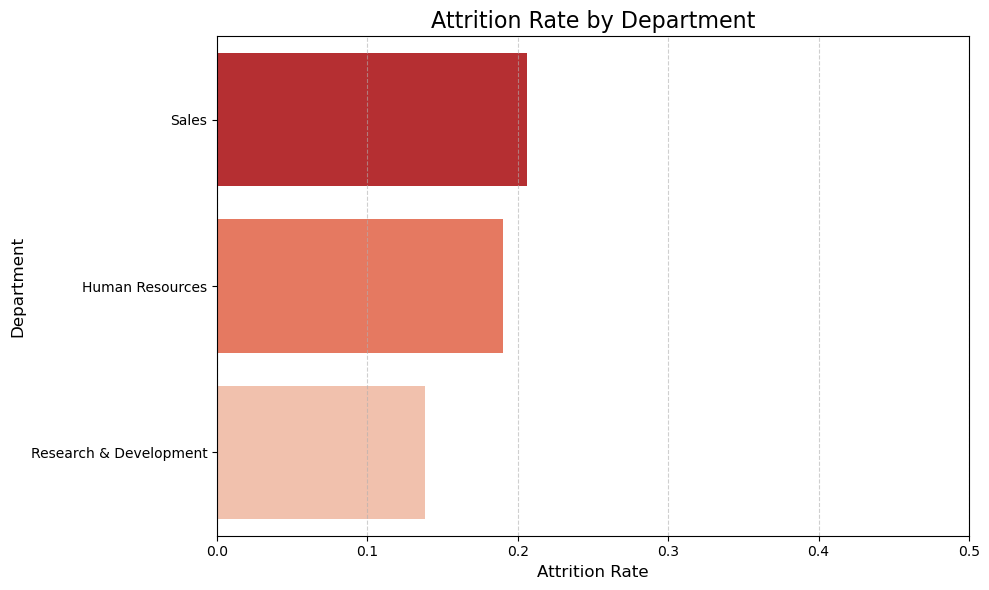

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10, 6))
sns.barplot(x=department_attrition.values, y=department_attrition.index, palette='Reds_r')
plt.title('Attrition Rate by Department', fontsize=16)
plt.xlabel('Attrition Rate', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.xlim(0, 0.5)  # Since it's a rate (0 to 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [18]:
department_attrition = df.groupby('Department')['Attrition_Numeric'].mean().reset_index()
department_attrition.rename(columns={'Attrition_Numeric': 'Attrition_Rate'}, inplace=True)


In [20]:

department_attrition.to_csv('department_attrition_rate.csv', index=False)


<h2><b>**2. Is there a strong relationship between job satisfaction and attrition?**</b></h2>

In [25]:
## Calculate attrition rate by Job Satisfaction
job_satisfaction_attrition = df.groupby('JobSatisfaction')['Attrition_Numeric'].mean()
print("Attrition Rate by Job Satisfaction (1=Low, 4=Very High):")
print(job_satisfaction_attrition)

# Calculate correlation between JobSatisfaction and Attrition
correlation_job_satisfaction = df['JobSatisfaction'].corr(df['Attrition_Numeric'])
print(f"\nCorrelation between JobSatisfaction and Attrition: {correlation_job_satisfaction:.2f}")

Attrition Rate by Job Satisfaction (1=Low, 4=Very High):
JobSatisfaction
1    0.228374
2    0.164286
3    0.165158
4    0.113290
Name: Attrition_Numeric, dtype: float64

Correlation between JobSatisfaction and Attrition: -0.10


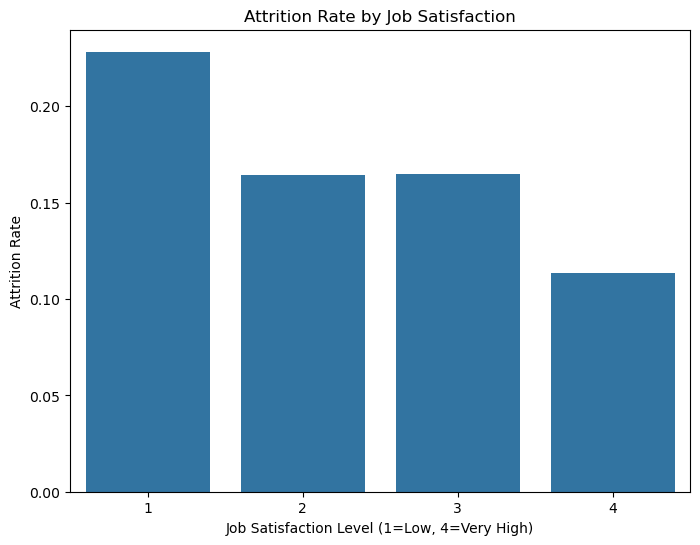

In [26]:

# --- Visualization: Job Satisfaction vs. Attrition ---
plt.figure(figsize=(8, 6))
sns.barplot(x='JobSatisfaction', y='Attrition_Numeric', data=df, errorbar=None)
plt.title('Attrition Rate by Job Satisfaction')
plt.xlabel('Job Satisfaction Level (1=Low, 4=Very High)')
plt.ylabel('Attrition Rate')
plt.show()

In [31]:
# Calculate attrition rate by Job Satisfaction and reset index to make it a DataFrame
job_satisfaction_attrition = df.groupby('JobSatisfaction')['Attrition_Numeric'].mean().reset_index()

# Rename the column for clarity in Power BI
job_satisfaction_attrition.rename(columns={'Attrition_Numeric': 'Attrition_Rate'}, inplace=True)

# Save the DataFrame to a CSV file
job_satisfaction_attrition.to_csv('job_satisfaction_attrition_rate.csv', index=False)


**Key Observations from the Plot:**

1. Inverse Relationship: There's a clear inverse relationship between job satisfaction and attrition. That is as job satisfaction increases, the attrition rate (the rate at which employees leave the company) tends to decrease. Conversely, as job satisfaction decreases, the attrition rate tends to increase.
2. Highest Attrition for Low Satisfaction: Employees with the lowest job satisfaction (Level 1) have the highest attrition rate, indicating they are most likely to leave the company.
3. Decreasing Attrition with Increasing Satisfaction: As job satisfaction increases from Level 1 to Level 4, the attrition rate generally decreases. This suggests that more satisfied employees are less likely to leave.
4. Lowest Attrition for Very High Satisfaction: Employees with the highest job satisfaction (Level 4) exhibit the lowest attrition rate, reinforcing the idea that high satisfaction contributes significantly to retention.

In summary, the plot visually confirms that job satisfaction is a crucial factor influencing employee retention, with lower satisfaction levels being strongly associated with higher attrition.

<h2><b>**3. Does Overtime or work-life balance correlate with attrition?**</b></h2>

In [32]:
# Attrition rate by OverTime
overtime_attrition = df.groupby('OverTime')['Attrition_Numeric'].mean()
print("Attrition Rate by OverTime:")
print(overtime_attrition)

# Convert 'OverTime' to numerical for correlation (Yes=1, No=0)
df['OverTime_Numeric'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
correlation_overtime = df['OverTime_Numeric'].corr(df['Attrition_Numeric'])
print(f"\nCorrelation between OverTime and Attrition: {correlation_overtime:.2f}")


Attrition Rate by OverTime:
OverTime
No     0.104364
Yes    0.305288
Name: Attrition_Numeric, dtype: float64

Correlation between OverTime and Attrition: 0.25


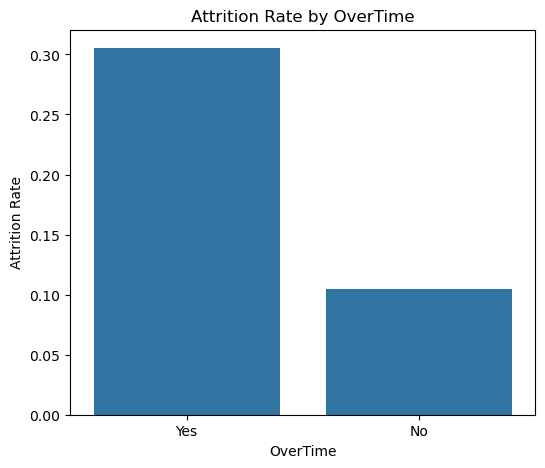

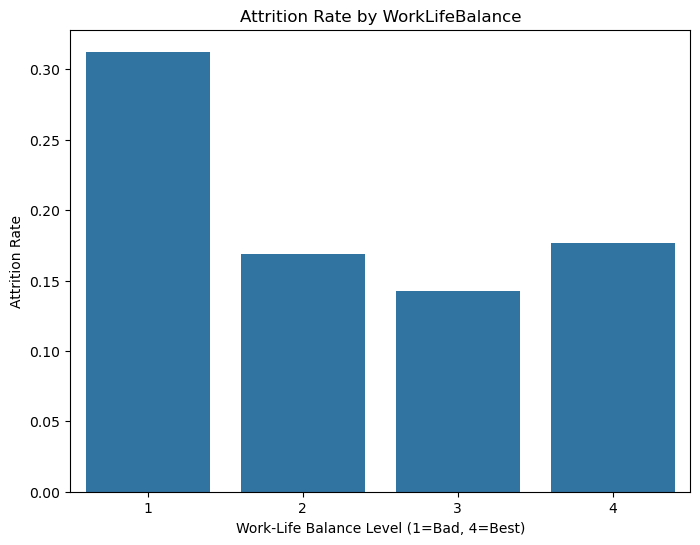

In [33]:

# Visualization 1: OverTime vs. Attrition ---
plt.figure(figsize=(6, 5))
sns.barplot(x='OverTime', y='Attrition_Numeric', data=df, errorbar=None)
plt.title('Attrition Rate by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Attrition Rate')
plt.show()

# Visualization 2: WorkLifeBalance vs. Attrition ---
plt.figure(figsize=(8, 6))
sns.barplot(x='WorkLifeBalance', y='Attrition_Numeric', data=df, errorbar=None)
plt.title('Attrition Rate by WorkLifeBalance')
plt.xlabel('Work-Life Balance Level (1=Bad, 4=Best)')
plt.ylabel('Attrition Rate')
plt.show()

In [35]:

#  Save data for OverTime vs. Attrition ---
overtime_attrition = df.groupby('OverTime')['Attrition_Numeric'].mean().reset_index()
overtime_attrition.rename(columns={'Attrition_Numeric': 'Attrition_Rate'}, inplace=True)
overtime_attrition.to_csv('overtime_attrition_rate.csv', index=False)

# Save data for WorkLifeBalance vs. Attrition ---
worklife_balance_attrition = df.groupby('WorkLifeBalance')['Attrition_Numeric'].mean().reset_index()
worklife_balance_attrition.rename(columns={'Attrition_Numeric': 'Attrition_Rate'}, inplace=True)
worklife_balance_attrition.to_csv('worklife_balance_attrition_rate.csv', index=False)

**Plot 1: Attrition Rate by OverTime**
This first bar plot shows how an employee's decision to work overtime (or not) is related to their likelihood of leaving the company.

Key Observation:
There's a stark difference in attrition rates between employees who work overtime and those who don't. Employees who work OverTime (Yes) have a significantly higher attrition rate (around 30.5%) compared to those who do not (No) (around 10.4%)
This plot strongly suggests that working overtime is a significant factor contributing to employee attrition. Employees who consistently work beyond their regular hours might experience increased stress, burnout, reduced work-life balance, and ultimately, dissatisfaction that leads them to seek opportunities elsewhere.

**Plot 2: Attrition Rate by WorkLife Balance**
The second bar plot illustrates the attrition rate based on an employee's self-reported work-life balance.
Key Observations:
1. Highest Attrition for "Bad" Work-Life Balance: Employees with a "Bad" work-life balance (Level 1) have the highest attrition rate (around 31.25%). This is a clear indicator that a poor work-life balance is a major driver of attrition.
2. Lower Attrition for "Good" and "Better" Balance: As work-life balance improves to "Good" (Level 2) and "Better" (Level 3), the attrition rate decreases significantly (around 16.86% and 14.22% respectively). This suggests that a healthy work-life balance helps in retaining employees.
3. Slight Increase for "Best" Balance: Interestingly, the attrition rate for those with "Best" work-life balance (Level 4) is slightly higher (around 17.65%) than for "Good" or "Better". While still much lower than "Bad", this might imply that other factors become more dominant for employees who already perceive their work-life balance as excellent, or it could be a statistical anomaly in this specific dataset.
   
The plot generally indicates that a poor work-life balance is a critical risk factor for employee attrition. Prioritizing and supporting employees' work-life balance can be an effective strategy for improving retention, especially for those currently experiencing a "Bad" balance.

<h2><b>**4. Are certain roles, age groups, or salary bands more at risk?**</b></h2> 

In [36]:
# Attrition by JobRole
job_role_attrition = df.groupby('JobRole')['Attrition_Numeric'].mean().sort_values(ascending=False)
print(job_role_attrition)

# Attrition by Age Group
age_bins = [18, 25, 35, 45, 55, 60]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_attrition = df.groupby('AgeGroup')['Attrition_Numeric'].mean().sort_values(ascending=False)
print(age_group_attrition)

# Attrition by Salary Band (MonthlyIncome)
income_bins = [0, 2500, 5000, 7500, 10000, 15000, df['MonthlyIncome'].max() + 1] # Add 1 to max to ensure all values are covered
income_labels = ['<$2500', '$2500-$5000', '$5000-$7500', '$7500-$10000', '$10000-$15000', '>$15000']
df['IncomeBand'] = pd.cut(df['MonthlyIncome'], bins=income_bins, labels=income_labels, right=False)
income_band_attrition = df.groupby('IncomeBand')['Attrition_Numeric'].mean().sort_values(ascending=False)
print(income_band_attrition)

JobRole
Sales Representative         0.397590
Laboratory Technician        0.239382
Human Resources              0.230769
Sales Executive              0.174847
Research Scientist           0.160959
Manufacturing Director       0.068966
Healthcare Representative    0.068702
Manager                      0.049020
Research Director            0.025000
Name: Attrition_Numeric, dtype: float64
AgeGroup
18-25    0.391753
26-35    0.202166
56-60    0.171875
46-55    0.102041
36-45    0.100990
Name: Attrition_Numeric, dtype: float64
IncomeBand
<$2500           0.343750
$2500-$5000      0.163810
$7500-$10000     0.146154
$10000-$15000    0.135135
$5000-$7500      0.096774
>$15000          0.037594
Name: Attrition_Numeric, dtype: float64


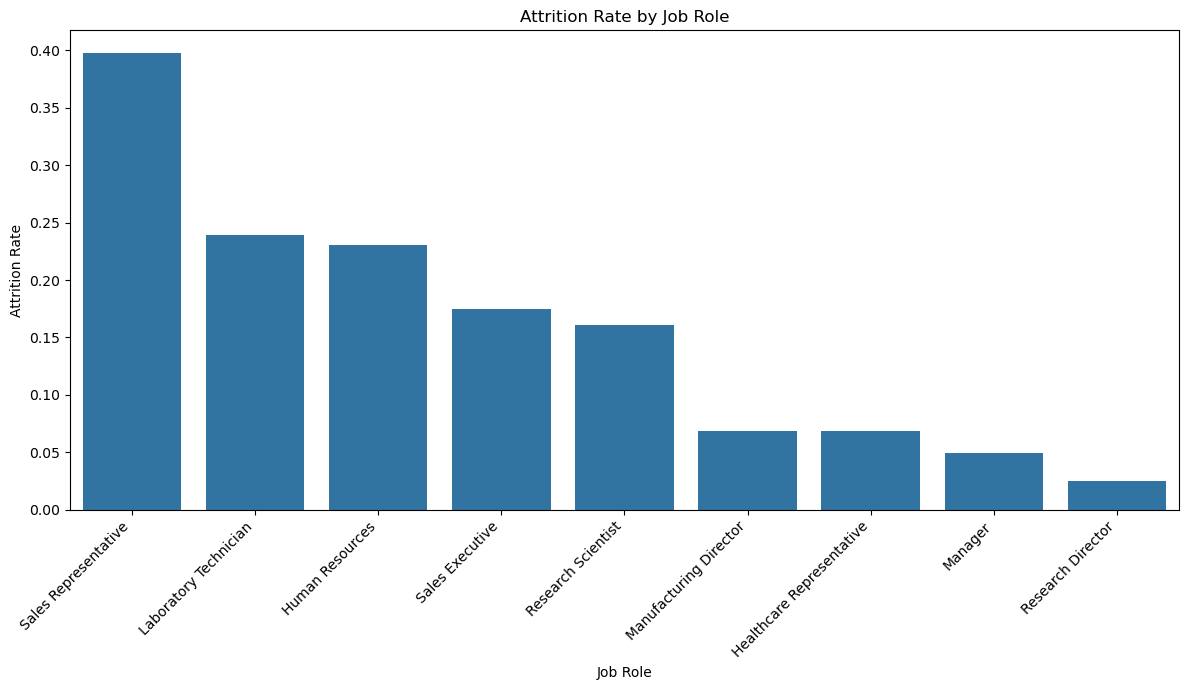

In [38]:
# Visualization 1: Job Role vs. Attrition ---
plt.figure(figsize=(12, 7))
sns.barplot(x='JobRole', y='Attrition_Numeric', data=df, errorbar=None,
            order=df.groupby('JobRole')['Attrition_Numeric'].mean().sort_values(ascending=False).index)
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

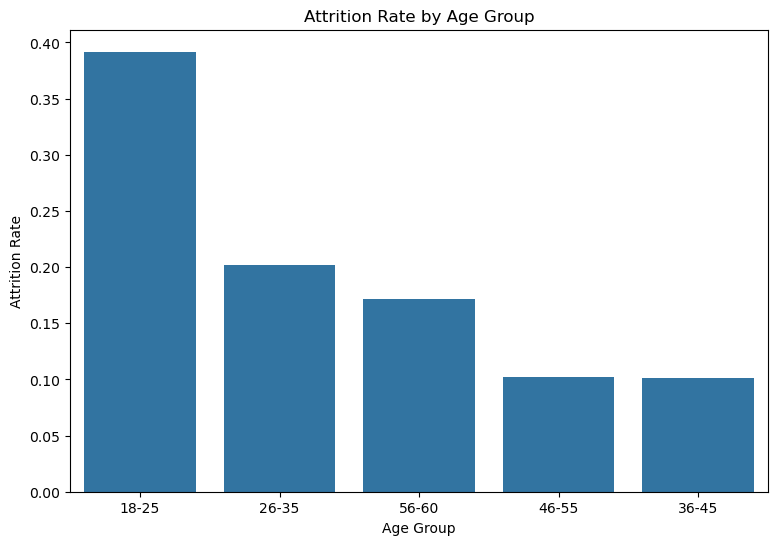

In [39]:

# Visualization 2: Age Group vs. Attrition 
plt.figure(figsize=(9, 6))
sns.barplot(x='AgeGroup', y='Attrition_Numeric', data=df, errorbar=None,
            order=df.groupby('AgeGroup')['Attrition_Numeric'].mean().sort_values(ascending=False).index)
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate')
plt.show()

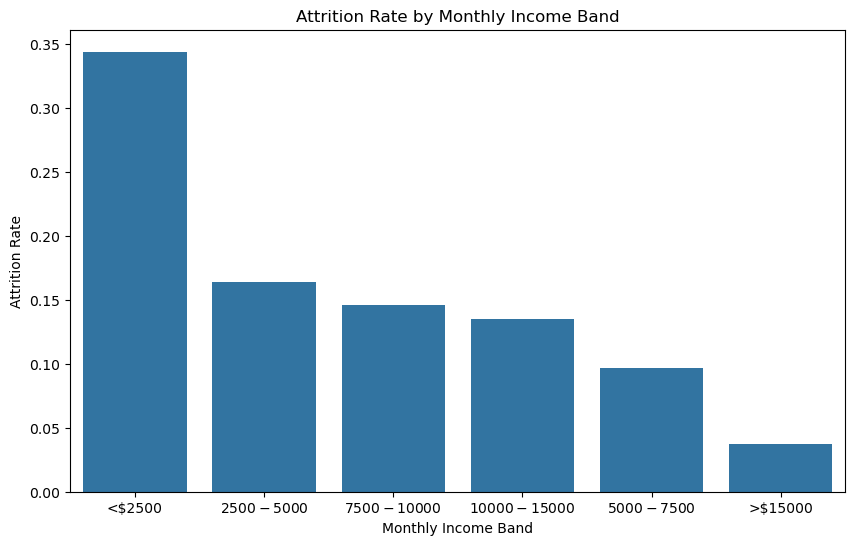

In [40]:
# Visualization 3: Salary Band (Monthly Income) vs. Attrition 
plt.figure(figsize=(10, 6))
sns.barplot(x='IncomeBand', y='Attrition_Numeric', data=df, errorbar=None,
            order=df.groupby('IncomeBand')['Attrition_Numeric'].mean().sort_values(ascending=False).index)
plt.title('Attrition Rate by Monthly Income Band')
plt.xlabel('Monthly Income Band')
plt.ylabel('Attrition Rate')
plt.show()

In [41]:
# Save data for Job Role vs. Attrition 
job_role_attrition = df.groupby('JobRole')['Attrition_Numeric'].mean().reset_index()
job_role_attrition.rename(columns={'Attrition_Numeric': 'Attrition_Rate'}, inplace=True)
job_role_attrition.to_csv('job_role_attrition_rate.csv', index=False)

# Save data for Age Group vs. Attrition 
age_group_attrition = df.groupby('AgeGroup')['Attrition_Numeric'].mean().reset_index()
age_group_attrition.rename(columns={'Attrition_Numeric': 'Attrition_Rate'}, inplace=True)
age_group_attrition.to_csv('age_group_attrition_rate.csv', index=False)

#  Save data for Salary Band (Monthly Income) vs. Attrition 
income_band_attrition = df.groupby('IncomeBand')['Attrition_Numeric'].mean().reset_index()
income_band_attrition.rename(columns={'Attrition_Numeric': 'Attrition_Rate'}, inplace=True)
income_band_attrition.to_csv('income_band_attrition_rate.csv', index=False)


**Plot 1: Attrition Rate by Job Role**
The first bar plot shows the percentage of employees leaving the company for each specific job role.

Key Observations 

1. Highest Risk Roles: Sales Representative has a significantly higher attrition rate (nearly 40%), making it the most at-risk role. Laboratory Technician and Human Resources also show high attrition rates, indicating potential challenges or dissatisfaction within these positions. These roles might involve higher stress, demanding tasks, or perceived limited growth opportunities, leading employees to seek alternatives.
2. Lowest Risk Roles: Research Director and Manager roles have very low attrition rates (around 2.5% and 4.9% respectively). This could be due to higher job satisfaction, better compensation, more autonomy, or a stronger sense of career progression and stability associated with these senior positions.
3. Varying Risks: Other roles like Sales Executive and Research Scientist fall in between, suggesting moderate attrition risks.
This plot highlights that attrition risk is not uniform across all job functions; specific roles face distinct challenges in retaining employees.

**Plot 2: Attrition Rate by Age Group**
This bar plot illustrates how an employee's age group correlates with their likelihood of leaving the company.

Key Observations and Explanation:
1. Younger Employees at Highest Risk: The 18-25 age group exhibits the highest attrition rate (around 39%). This is a very common trend in many organizations, as younger employees might be in an exploratory phase of their careers, seeking more diverse experiences, higher initial compensation, or different company cultures. They might also have fewer ties to the current company (e.g., less tenure, fewer benefits accrued).
2. Decreasing Risk with Age: Generally, the attrition rate decreases significantly as employees get older, with the 36-45 and 46-55 age groups showing the lowest rates (around 10%). This could be attributed to increased job stability, higher compensation, established careers, family commitments, or greater comfort with their current role and company.
3. Slight Increase in Older Age Group: There's a slight uptick in attrition for the 56-60 age group compared to the immediately preceding age groups. This might be due to factors like retirement planning, seeking less demanding roles, or a desire for a different work-life balance closer to retirement.
This plot emphasizes the importance of targeted retention strategies for younger employees, who appear to be the most volatile segment of the workforce.

**Plot 3: Attrition Rate by Monthly Income Band**
This bar plot visualizes the relationship between an employee's monthly income range and their attrition rate.
Key Observations and Explanation:
1. Strong Inverse Relationship: There is a very strong inverse relationship between monthly income and attrition. Employees in the lowest income band (<$2500) have by far the highest attrition rate (around 34.4%).
2. Attrition Decreases with Income: As monthly income increases, the attrition rate consistently and significantly decreases. The highest income band (>$15000) has the lowest attrition rate (around 3.8%).
This plot clearly indicates that compensation is a critical factor in employee retention. Employees in lower salary bands are much more likely to leave, possibly due to financial pressure, feeling undervalued, or actively seeking higher-paying opportunities. Investing in competitive compensation, especially for lower-earning roles, could be a highly effective strategy to reduce attriion.

<h2><b>**Conclusion**</b></h2>
This analysis aimed to identify key factors influencing employee attrition within the provided dataset. We found that attrition is a complex issue driven by several interconnected variables.
Conclusion of the findings:

**Significant Attrition Drivers:**

Overtime: Employees working overtime show a significantly higher attrition rate.
Low Job Satisfaction: Lower levels of job satisfaction are clearly associated with higher attrition.
Lower Income: Employees in lower salary bands are at a substantially higher risk of attrition.

Specific Job Roles: Roles such as Sales Representative, Laboratory Technician, and Human Resources have notably higher attrition rates.
Younger Age Groups: Employees in the 18-25 age group are most prone to attrition.

Work-Life Balance: A poor work-life balance is a major factor contributing to attrition, with the highest rates seen in the 'Bad' category. While improving work-life balance generally reduces attrition, the relationship becomes more nuanced at higher satisfaction levels.

Inverse Relationships: We observed clear inverse relationships where factors like job satisfaction, higher income, and generally improving work-life balance lead to decreased attrition.

In essence, employee attrition in this dataset is strongly influenced by factors related to workload (overtime), overall employee well-being (job satisfaction, work-life balance), and compensation, with younger employees and specific job roles being particularly vulnerable. Addressing these areas could be crucial for improving employee retention.
